C:\Users\31649\AppData\Local\Temp\ipykernel_36076\2275391186.py:26: RuntimeWarning: covariance is not positive-semidefinite.
  cluster3 = np.random.multivariate_normal(mean3, cov3, num_samples3)


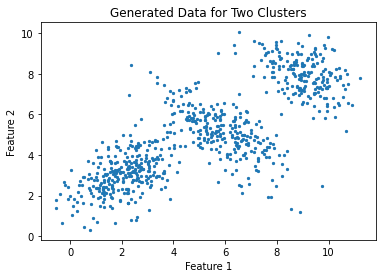

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generating random data for two clusters
np.random.seed(0)

# Parameters for the first cluster
mean1 = [2, 3]
cov1 = [[1, 0.5], [0.5, 1]]
num_samples1 = 300

# Parameters for the second cluster
mean2 = [9, 8]
cov2 = [[1, -0.5], [-0.5, 1]]
num_samples2 = 200

# Parameters for the third cluster
mean3 = [6, 5]
cov3 = [[1, -1.5], [-1.5, 1]]
num_samples3 = 250

# Generating data points for the two clusters
cluster1 = np.random.multivariate_normal(mean1, cov1, num_samples1)
cluster2 = np.random.multivariate_normal(mean2, cov2, num_samples2)
cluster3 = np.random.multivariate_normal(mean3, cov3, num_samples3)

# Combining the data
data = np.vstack((cluster1, cluster2, cluster3))

# Plotting the generated data
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.title('Generated Data for Two Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


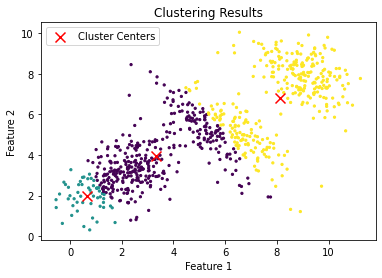

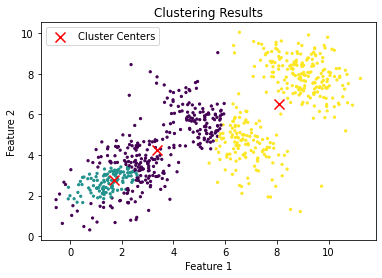

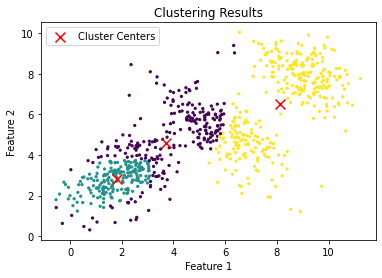

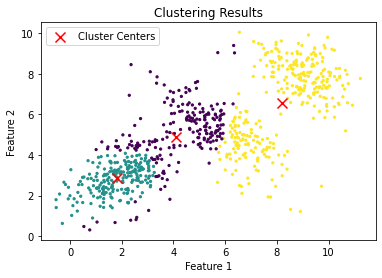

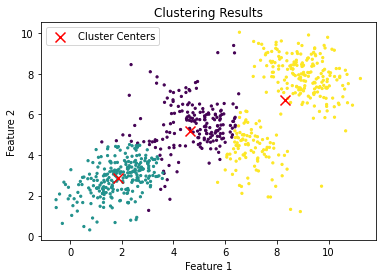

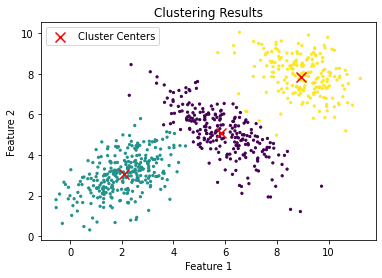

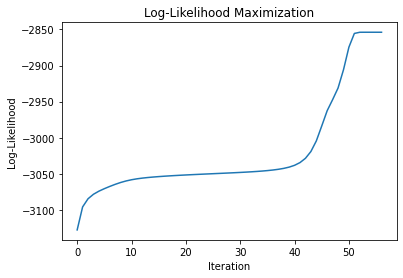

Converged after 57 iterations.


In [32]:
def initialize_parameters(data, num_clusters):
    # Initialize means randomly
    means = data[np.random.choice(len(data), num_clusters, replace=False)]
    epsilon = 0.1
    # Initialize covariances as identity matrices
    covariances = [np.eye(data.shape[1]) * epsilon  for _ in range(num_clusters)]
    
    # Initialize mixing coefficients uniformly
    #The mixing coefficients represent the relative proportions of these clusters in the overall dataset 
    # (pi coefficients)
    mixing_coefficients = np.ones(num_clusters) / num_clusters
    
    return means, covariances, mixing_coefficients

def expectation_step(data, means, covariances, mixing_coefficients):
    num_clusters = len(means)
    num_samples = len(data)
    responsibilities = np.zeros((num_samples, num_clusters))
    
    for k in range(num_clusters):
        # Calculate the probability of each sample belonging to cluster k using multivariate normal distribution
        responsibilities[:, k] = mixing_coefficients[k] * multivariate_normal.pdf(data, means[k], covariances[k])
    
    # Normalize the responsibilities
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
    return responsibilities

def maximization_step(data, responsibilities):
    num_clusters = responsibilities.shape[1]
    num_samples = len(data)
    means = np.zeros((num_clusters, data.shape[1]))
    covariances = [np.zeros((data.shape[1], data.shape[1])) for _ in range(num_clusters)]
    mixing_coefficients = np.zeros(num_clusters)
    
    for k in range(num_clusters):
        # Update means
        means[k] = np.dot(responsibilities[:, k], data) / responsibilities[:, k].sum()
        
        # Update covariances
        diff = data - means[k]
        covariances[k] = np.dot(responsibilities[:, k] * diff.T, diff) / responsibilities[:, k].sum()
        
        # Update mixing coefficients
        mixing_coefficients[k] = responsibilities[:, k].mean()
    
    return means, covariances, mixing_coefficients

def log_likelihood(data, means, covariances, mixing_coefficients):
    likelihoods = np.zeros(len(data))
    for k in range(len(means)):
        likelihoods += mixing_coefficients[k] * multivariate_normal.pdf(data, means[k], covariances[k])
    return np.log(likelihoods).sum()

def plot_clusters(data, responsibilities, means):
    num_clusters = responsibilities.shape[1]
    
    plt.scatter(data[:, 0], data[:, 1], c=np.argmax(responsibilities, axis=1), cmap='viridis', s=5)
    plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title('Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def expectation_maximization(data, num_clusters, num_iterations=100, tol=1e-4):
    # Initialize parameters
    means, covariances, mixing_coefficients = initialize_parameters(data, num_clusters)
    
    # Initialize log likelihoods list
    log_likelihoods = []
    
    # EM algorithm iterations
    prev_log_likelihood = -np.inf
    for i in range(num_iterations):
        # Expectation step
        responsibilities = expectation_step(data, means, covariances, mixing_coefficients)
        
        # Maximization step
        means, covariances, mixing_coefficients = maximization_step(data, responsibilities)
        
        # Calculate log-likelihood and check for convergence
        log_likelihood_val = log_likelihood(data, means, covariances, mixing_coefficients)
        log_likelihoods.append(log_likelihood_val)
        
        if log_likelihood_val - prev_log_likelihood < tol:
            break
        prev_log_likelihood = log_likelihood_val
        
        # Plot clusters
        if i % 10 == 0:
            plot_clusters(data, responsibilities, means)
 
    # Plot log-likelihood over iterations
    plt.plot(range(len(log_likelihoods)), log_likelihoods)
    plt.title('Log-Likelihood Maximization')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.show()
    
    
    print(f'Converged after {i+1} iterations.')

# Applying EM algorithm for clustering
num_clusters = 3
expectation_maximization(data, num_clusters)


Getting the means of the Gaussians:
[[5.88889949 5.11242647]
 [9.01775154 7.95780538]
 [2.07586618 3.0398636 ]]


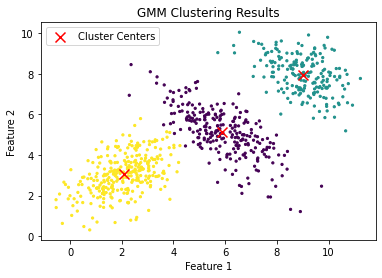

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Perform GMM clustering
num_clusters = 3
gmm = GaussianMixture(n_components=num_clusters, random_state=0)
gmm.fit(data)
labels = gmm.predict(data)
print('Getting the means of the Gaussians:')
means = gmm.means_
print(means)

# Plotting the clustering results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [35]:
# Getting probabilities of each sample for each cluster
probabilities = gmm.predict_proba(data)

# Getting log probabilities of each sample
log_probabilities = gmm.score_samples(data)

# You can now use 'probabilities' and 'log_probabilities' for further analysis or plotting
print("Probabilities:\n", probabilities)
print("Log probabilities:\n", log_probabilities)

Probabilities:
 [[1.61847592e-19 7.82991597e-49 1.00000000e+00]
 [5.52057788e-14 9.82807039e-41 1.00000000e+00]
 [6.24234770e-20 1.68024904e-49 1.00000000e+00]
 ...
 [1.00000000e+00 7.10305670e-13 2.49526146e-10]
 [9.99831513e-01 9.23296632e-08 1.68394591e-04]
 [9.99999230e-01 2.14743876e-08 7.48407732e-07]]
Log probabilities:
 [-4.36962102 -5.69624192 -4.9957297  -3.14523743 -2.71715901 -3.74441304
 -2.96830614 -2.80954446 -3.86147692 -3.03412142 -4.59628187 -3.32203074
 -6.46990113 -2.63413932 -4.964783   -2.72381846 -4.80533274 -2.67569613
 -4.18152206 -2.70034173 -4.02004929 -6.00835475 -2.78996041 -3.6838055
 -3.81728664 -3.0611711  -3.35741843 -2.72430531 -2.68086856 -2.82537984
 -2.84647497 -4.29212005 -2.71570447 -3.98423239 -2.97656576 -2.94342353
 -4.11303183 -2.9471939  -3.07487578 -2.65080167 -3.69396077 -3.91376003
 -5.61257935 -3.41063755 -3.75297242 -3.48143838 -3.16045176 -2.97306801
 -4.28234091 -2.72838917 -5.46832483 -3.88788656 -5.26646956 -2.92288411
 -5.66599767 -

In [37]:
probabilities.shape

(750, 3)

In [38]:
log_probabilities.shape

(750,)